In [13]:
import pandas as pd
import numpy as np
import os
import sys

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

from data_loader import CSVDataloader, get_file_path
from data_processing import Processing
from feature_engineering import FeatureEngineering

## Load Credit Risk data for Analysis

In [14]:
# Load AAPL data
data = get_file_path("csvpath")
df = CSVDataloader(data).load_data()

In [3]:
# Call functions
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Overview of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
df.size

1530592

In [9]:
df.shape

(95662, 16)

In [12]:
df['ChannelId'].value_counts()

ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64

In [4]:
df['ProviderId'].value_counts()

ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64

In [5]:
df['ProductCategory'].value_counts()

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

### Summary Statistics

In [5]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

In [14]:
# Central Tendency
print("\n--- Central Tendency ---")
print("Mean:\n", numeric_cols.mean())
print("Median:\n", numeric_cols.median())
print("Mode:\n", numeric_cols.mode().iloc[0])


--- Central Tendency ---
Mean:
 CountryCode         256.000000
Amount             6717.846433
Value              9900.583941
PricingStrategy       2.255974
FraudResult           0.002018
dtype: float64
Median:
 CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
dtype: float64
Mode:
 CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
Name: 0, dtype: float64


In [16]:
# Dispersion
print("\n--- Dispersion ---")
print("Standard Deviation:\n", numeric_cols.std())


--- Dispersion ---
Standard Deviation:
 CountryCode             0.000000
Amount             123306.797164
Value              123122.087776
PricingStrategy         0.732924
FraudResult             0.044872
dtype: float64


In [17]:
print("Variance:\n", numeric_cols.var())

Variance:
 CountryCode        0.000000e+00
Amount             1.520457e+10
Value              1.515905e+10
PricingStrategy    5.371778e-01
FraudResult        2.013471e-03
dtype: float64


In [18]:
print("Range:\n", numeric_cols.max() - numeric_cols.min())

Range:
 CountryCode               0.0
Amount             10880000.0
Value               9879998.0
PricingStrategy           4.0
FraudResult               1.0
dtype: float64


In [19]:
print("Interquartile Range (IQR):\n", numeric_cols.quantile(0.75) - numeric_cols.quantile(0.25))

Interquartile Range (IQR):
 CountryCode           0.0
Amount             2850.0
Value              4725.0
PricingStrategy       0.0
FraudResult           0.0
dtype: float64


In [6]:
# Shape of Distribution
print("\n--- Shape of Distribution ---")
print("Skewness:\n", numeric_cols.skew())


--- Shape of Distribution ---
Skewness:
 CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


In [21]:
print("Kurtosis:\n", numeric_cols.kurtosis())

Kurtosis:
 CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64


### Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.


In [3]:
preprocess = Processing(df)

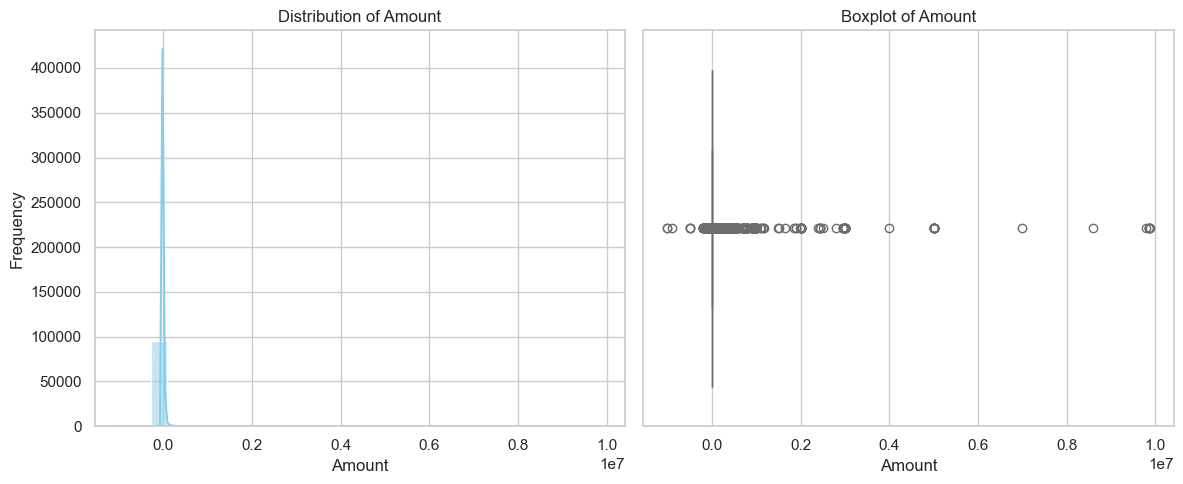

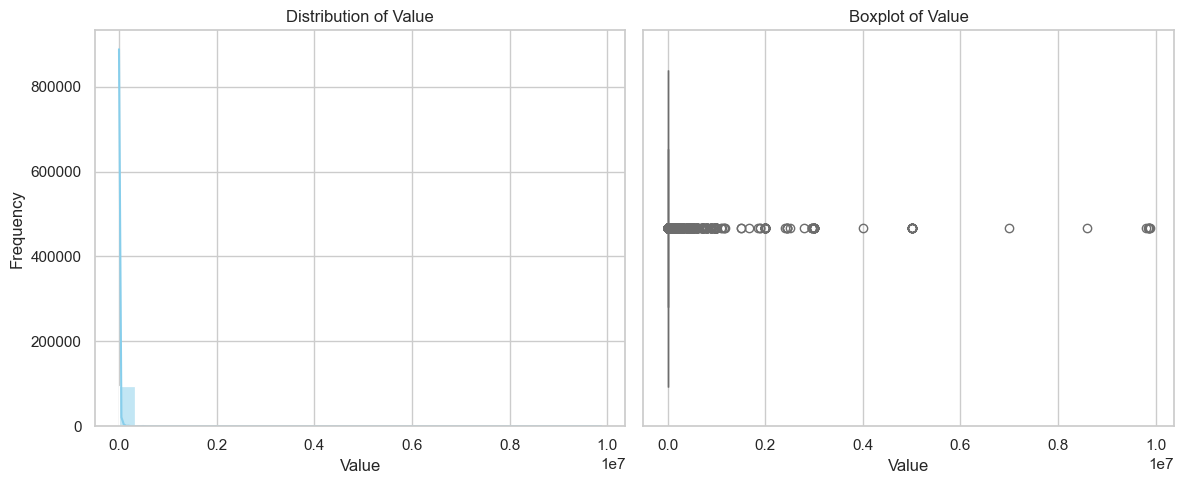

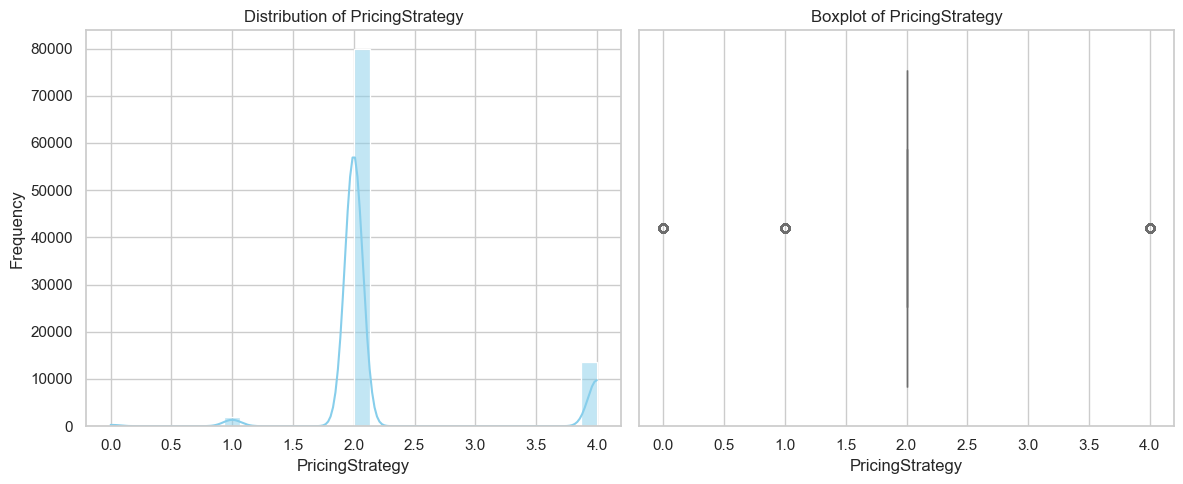

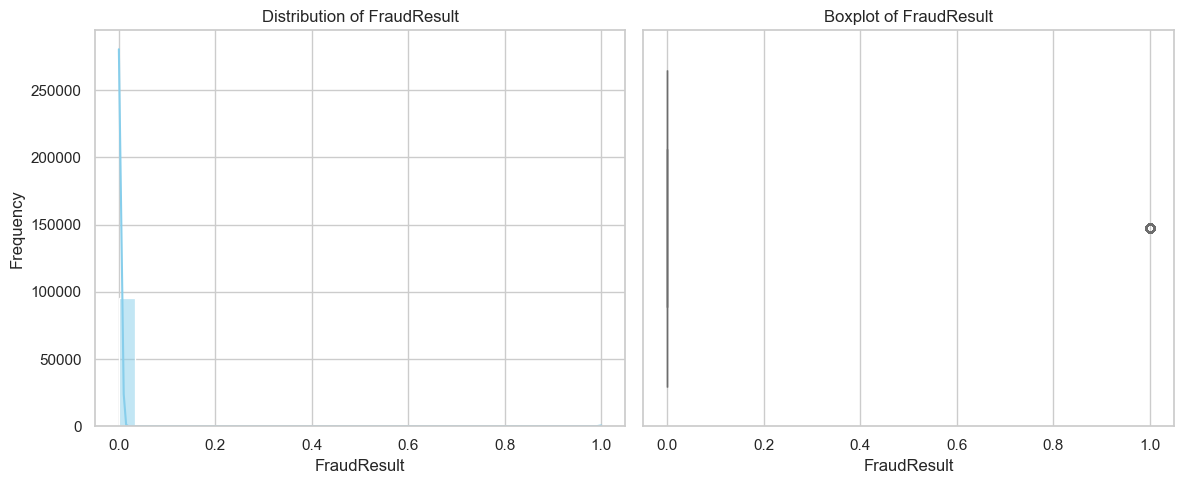

In [4]:
preprocess.numeric_distributions()

### Distribution of Categorical Features

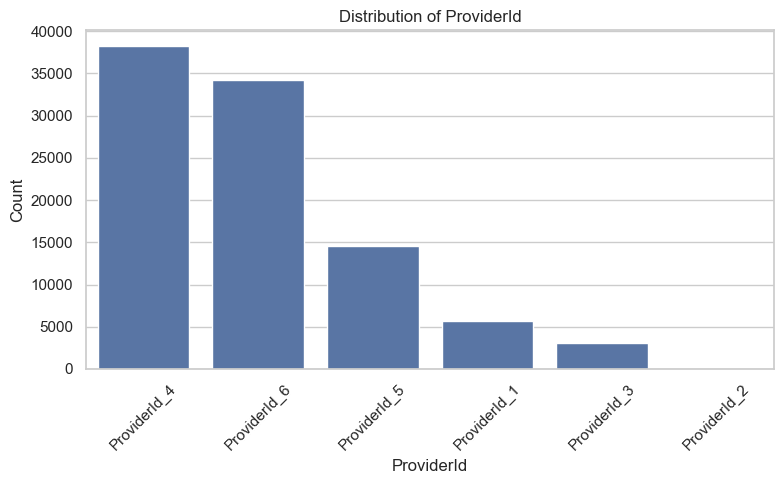

In [7]:
preprocess.categorical_distributions(column='ProviderId')

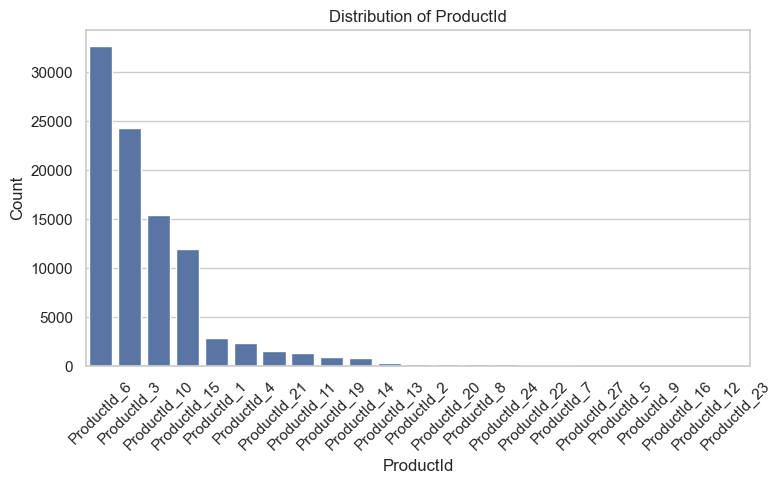

In [15]:
preprocess.categorical_distributions(column='ProductId')

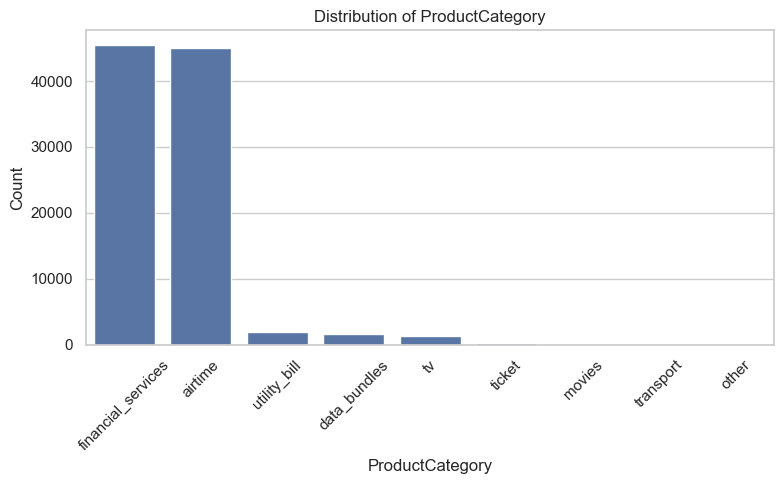

In [16]:
preprocess.categorical_distributions(column='ProductCategory')

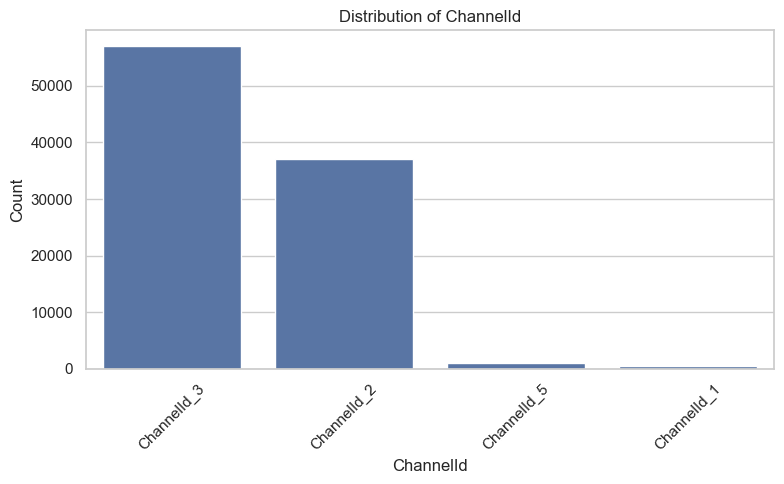

In [17]:
preprocess.categorical_distributions(column='ChannelId')

### Correlation Analysis

In [5]:
df.select_dtypes(include=[np.number]).corr()

,Amount,Value,PricingStrategy,FraudResult
Amount,1.000000,0.989692,-0.061931,0.557370
Value,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,0.557370,0.566739,-0.033821,1.000000


### Correlation Analysis
○	Understanding the relationship between numerical features

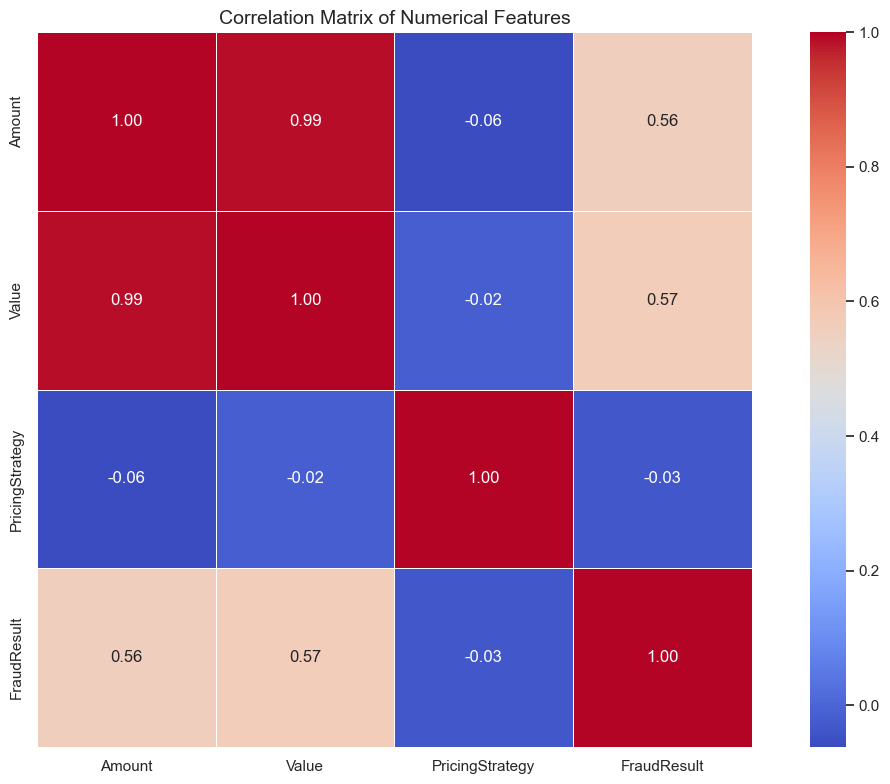

In [8]:
preprocess.plot_correlation_matrix()

### Identifying Missing Values
○	Identify missing values to determine missing data and decide on appropriate imputation strategies


--- Missing Values Summary ---

Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

Visualizing Missingness (useful for pattern detection):


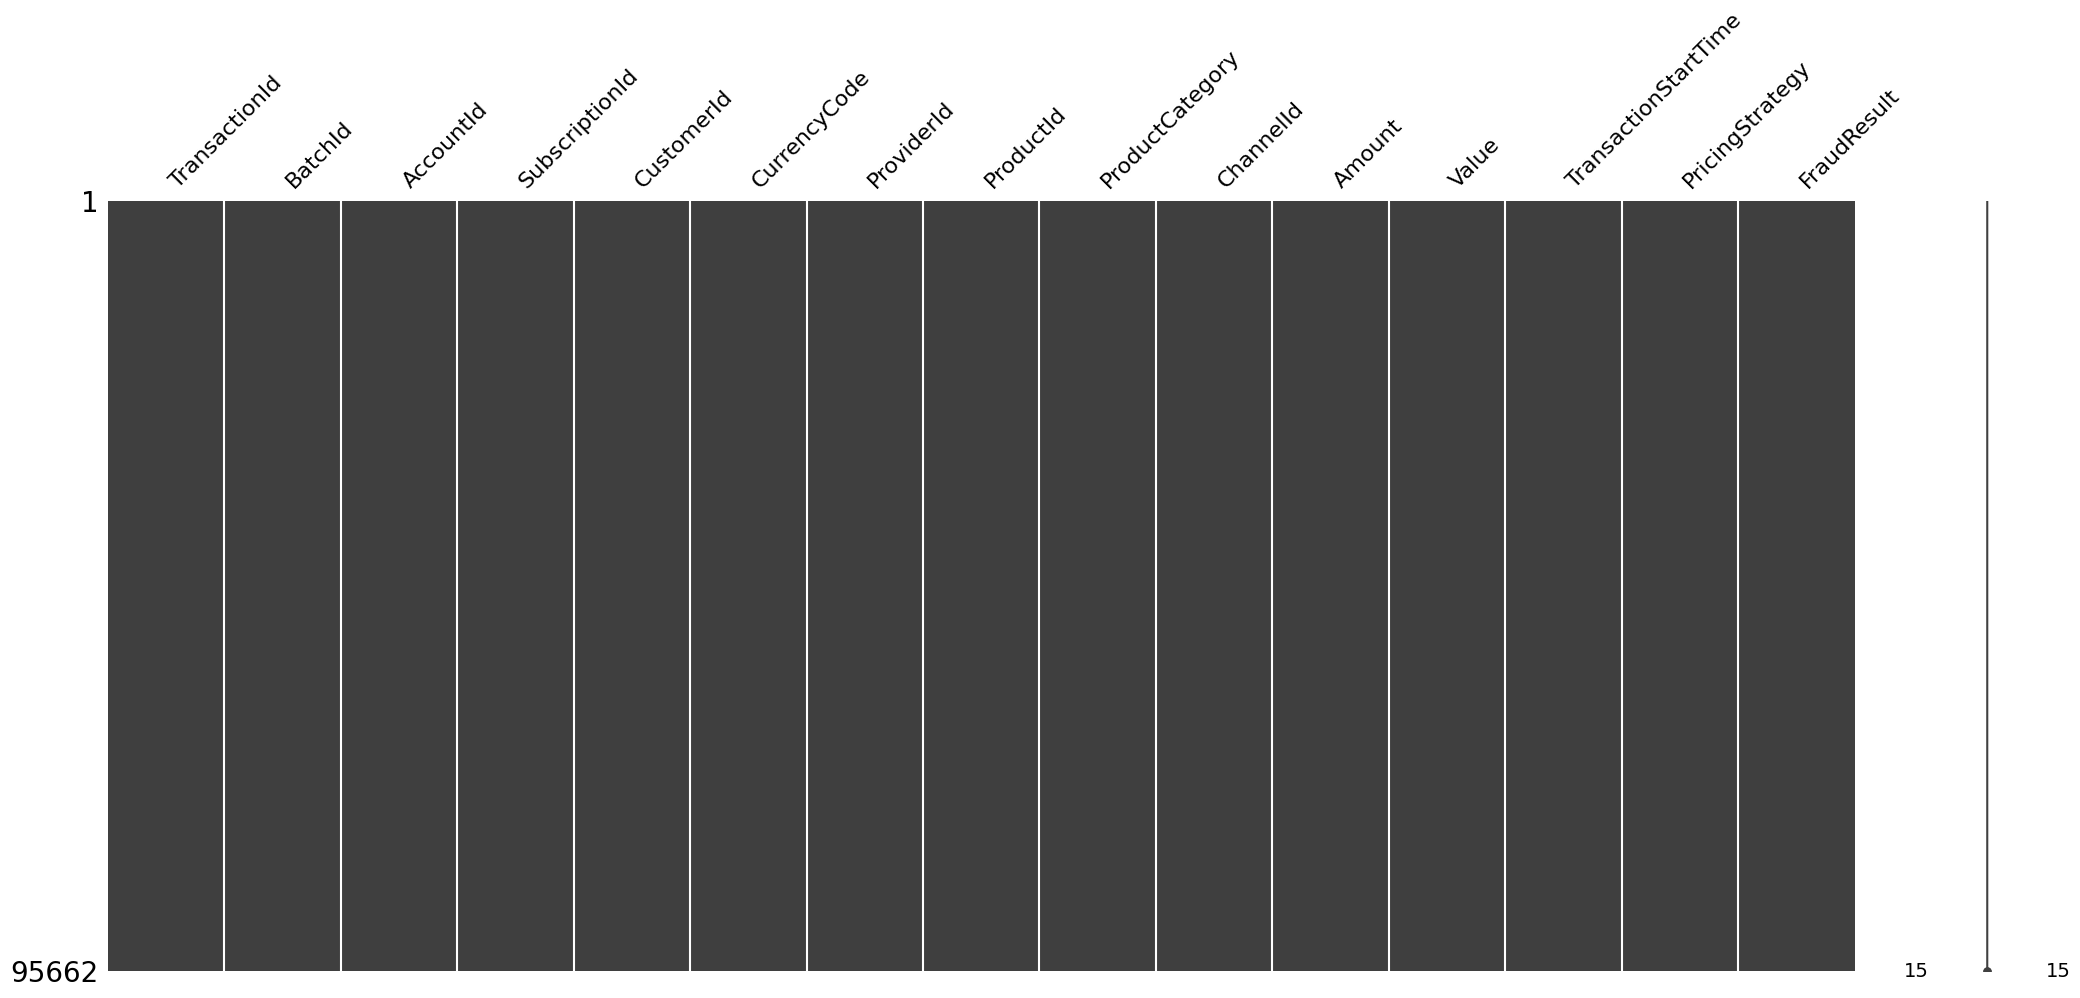

In [6]:
preprocess.missing_values()

### Outlier Detection


--- Outlier Detection Using Boxplots ---



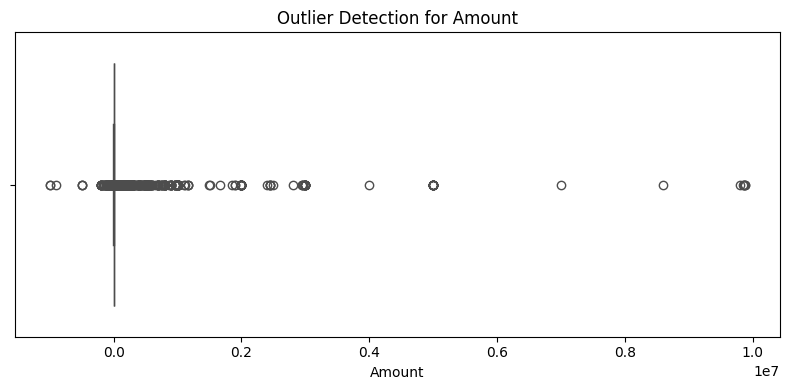

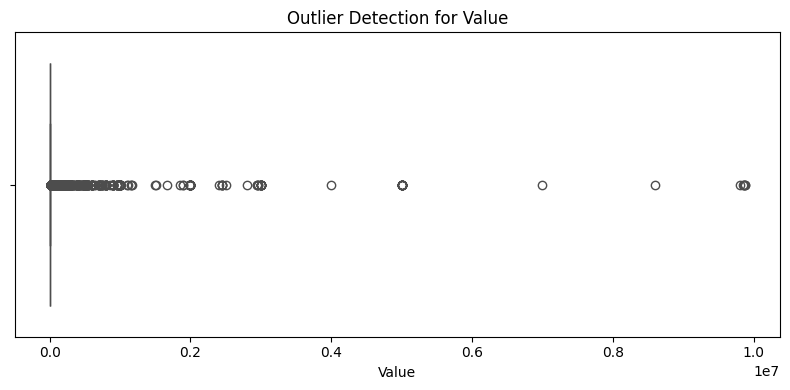

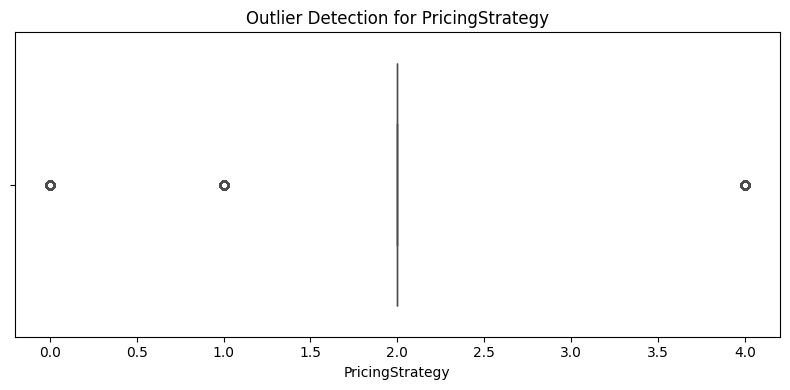

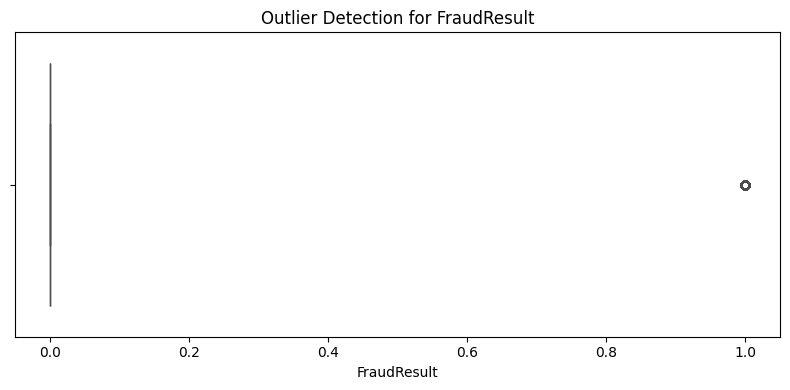

In [7]:
preprocess.detect_outliers()

# Feature Engineering
Build a robust, automated, and reproducible data processing script that transforms raw data into a model-ready format.

In [8]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'Amount', 'Value', 'TransactionStartTime',
       'PricingStrategy', 'FraudResult'],
      dtype='object')

In [12]:
df.SubscriptionId.value_counts()

SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
                       ...  
SubscriptionId_1425        1
SubscriptionId_1429        1
SubscriptionId_2604        1
SubscriptionId_756         1
SubscriptionId_258         1
Name: count, Length: 3627, dtype: int64

In [15]:
# drop columns
df = df.drop(columns=['CountryCode','CurrencyCode', 'SubscriptionId', 'BatchId','Value'], axis=1)

In [16]:
feature = FeatureEngineering(df)

### Create Aggregate Features

In [17]:
df =feature.create_aggregate_features()

In [18]:
df.head()

,TransactionId,AccountId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,StdTransactionAmount
0,TransactionId_76871,AccountId_3957,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,AccountId_4841,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,AccountId_4229,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,AccountId_648,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,AccountId_4841,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


### Extract Features

In [19]:
df = feature.extract_datetime_features()

In [20]:
df.head()

,TransactionId,AccountId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,AccountId_3957,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,AccountId_4841,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,AccountId_4229,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,AccountId_648,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,AccountId_4841,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


### Encode Categorical Variables
Convert categorical variables into numerical format by using onehot

In [21]:
df = feature.encode_categorical_variables()

In [22]:
df.head()

,TransactionId,AccountId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,AccountId_4841,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,119,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,AccountId_4229,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,AccountId_648,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,38,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TransactionId_28195,AccountId_4841,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,38,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Handle Missing Values
Use imputation or Removal to handle missing values

In [23]:
df = feature.handle_missing_values()

In [24]:
df.head()

,TransactionId,AccountId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2.0,0.0,109921.75,923.712185,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,AccountId_4841,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2.0,0.0,109921.75,923.712185,119.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,AccountId_4229,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2.0,0.0,1000.00,500.000000,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,AccountId_648,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2.0,0.0,228727.20,6019.136842,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TransactionId_28195,AccountId_4841,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2.0,0.0,228727.20,6019.136842,38.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Normalize/Standardize Numerical Features
Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.

In [27]:
df = feature.normalize_or_standardize()

In [28]:
df.head()

,TransactionId,AccountId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,CustomerId_4406,-0.046371,2018-11-15 02:18:49+00:00,-0.349252,-0.044962,0.170118,-0.067623,-0.311831,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245
1,TransactionId_73770,AccountId_4841,CustomerId_4406,-0.054643,2018-11-15 02:19:08+00:00,-0.349252,-0.044962,0.170118,-0.067623,-0.311831,...,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,1.255247,-1.212503,-0.105245
2,TransactionId_26203,AccountId_4229,CustomerId_4683,-0.050426,2018-11-15 02:44:21+00:00,-0.349252,-0.044962,0.165122,-0.072568,-0.444993,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245
3,TransactionId_380,AccountId_648,CustomerId_988,0.107717,2018-11-15 03:32:55+00:00,-0.349252,-0.044962,0.175567,-0.008155,-0.404020,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,6.987414,-0.796656,0.824740,-0.105245
4,TransactionId_28195,AccountId_4841,CustomerId_988,-0.059704,2018-11-15 03:34:21+00:00,-0.349252,-0.044962,0.175567,-0.008155,-0.404020,...,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,1.255247,-1.212503,-0.105245
